# Probabilistic Time Series Analysis

## Week 9: Introduction to Gaussian Processes

You will need the following new Python package. Install it either with `conda install -c conda-forge` if you use the Anaconda environment or `pip install`.

    GPy

Places where you are supposed to fill in code are marked

    #
    # TODO: some instructions
    # 
    
The rest of the code we will run and discuss if time permits, otherwise try it out at home and try to answer the questions mentioned in the text boxes for yourself.

### Please turn in the code before 11/21/2018 5:20pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to other questions in the text blocks, just think them over.

### Title your submission file `lab9-student-[YOUR NET ID].ipynb`.

# Setup

In [1]:
import numpy as np
import GPy

%matplotlib inline

# I. Basic Example

In [2]:
# NOTE: Read this function carefully! You will modify it in the following sections.

def uniform_samples(x_min, x_max, n_samples, f, noise_scale):
    """Generates f(x) + noise for x uniformly distributed in [x_min, x_max]."""
    X = np.random.uniform(x_min, x_max, size=(n_samples, 1))
    Y = f(X) + np.random.normal(scale=noise_scale, size=(n_samples, 1))
    return X, Y

 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


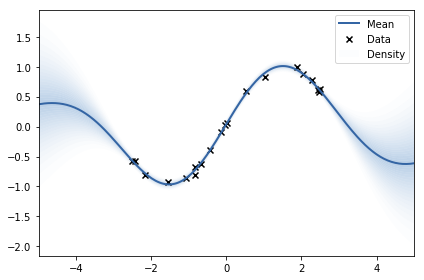

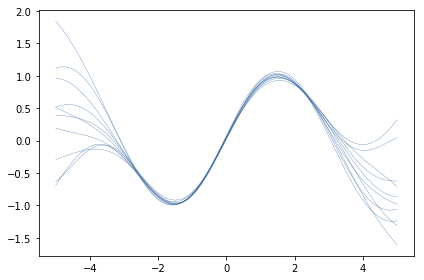

In [3]:
# Build sample points and values:
X, Y = uniform_samples(-3.0, 3.0, 20, np.sin, 0.05)

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X, Y, kernel)
# This step estimates maximum likelihood values for the kernel parameters:
_ = m.optimize()

_ = m.plot(plot_density=True, plot_limits=[-5.0, 5.0])
_ = m.plot_samples(samples=10, plot_limits=[-5.0, 5.0])

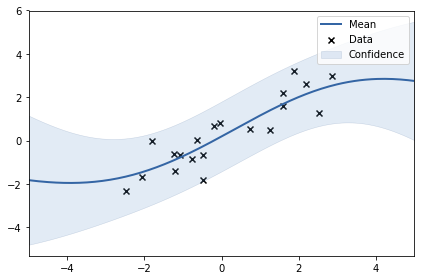

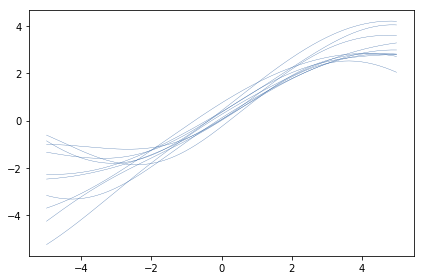

In [16]:
# NOTE: Now we'll draw data that's just on a line, but with more noise.
X, Y = uniform_samples(-3.0, 3.0, 20, lambda x: x, 0.8)

kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-5.0, 5.0])
_ = m.plot_samples(samples=10, plot_limits=[-5.0, 5.0])

# NOTE: Run this a few times and see if you notice signs of overfitting.

# II. Gaps in Data Coverage

In [27]:
#
# TODO: Write a version of uniform_samples where there are no samples in the middle half
# of the interval [x_min, x_max], i.e. in the subinterval [x_min + (x_max - x_min) / 4, 
# x_max - (x_max - x_min) / 4]. What happens to the estimates in this region?
#

def gapped_samples(x_min, x_max, n_samples, f, noise_scale):
    a = x_min + (x_max - x_min) / 4
    b = x_max - (x_max - x_min) / 4
    
    size_1 = int(n_samples / 2)
    size_2 = n_samples - size_1
    sample_1 = np.random.uniform(low=x_min, high=a, size=(size_1, 1))
    sample_2 = np.random.uniform(low=b, high=x_max, size=(size_2, 1))
    X = np.vstack((sample_1, sample_2))
    
    Y = f(X) + np.random.normal(scale=noise_scale, size=(n_samples, 1))
    return X, Y

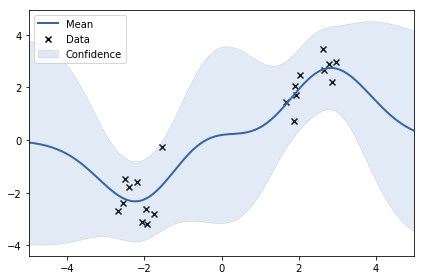

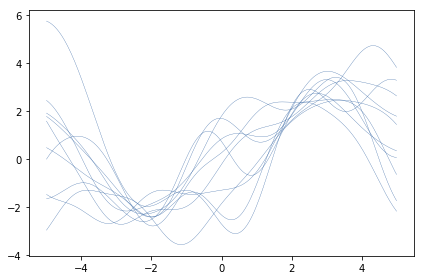

In [33]:
# Make plots like in the previous section but replacing uniform_samples with gapped_samples. What changes?

X, Y = gapped_samples(-3.0, 3.0, 20, lambda x: x, 0.8)

kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-5.0, 5.0])
_ = m.plot_samples(samples=10, plot_limits=[-5.0, 5.0])

# NOTE: Run this a few times and see if you notice signs of overfitting.

# III. Choice of Kernel

In [119]:
# Build sample points and values:
X, Y = uniform_samples(-10.0, 10.0, 100, np.sin, 0.5)

In [120]:
#
# TODO: Using the single set of example data above, try repeating the previous steps (one set of plots per cell)
# with the following alternate kernels (read the documentation and use some sensible initial parameter settings):
#
# - GPy.kern.RBF (like before)   :   squared exponential
# - GPy.kern.RatQuad             :   rational quadratic
# - GPy.kern.Linear              :   linear
# - GPy.kern.Brownian            :   covariance of Brownian motion
# - GPy.kern.PeriodicExponential :   periodic
#
# To do this, edit the line `kernel = GPy.kern.SOMETHING(input_dim=1, ...)`
#
# For the last one, first try the parameter `period=6.0`, close to the actual period of our data, and then try
# systematically decreasing this parameter until the model starts failing.

# If you're interested, you can read more about these choices here:
# https://www.cs.toronto.edu/~duvenaud/cookbook/
#

## RBF

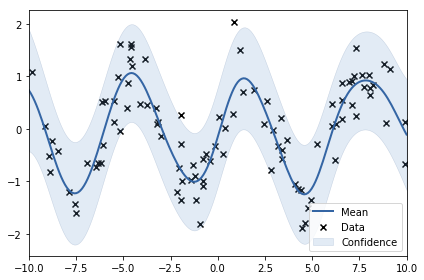

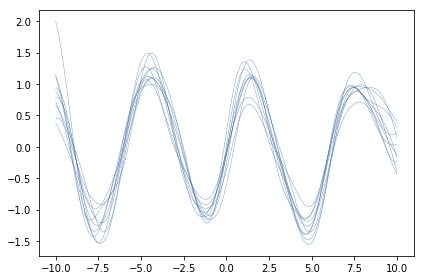

In [121]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=0.01)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

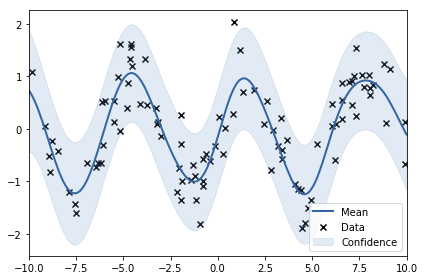

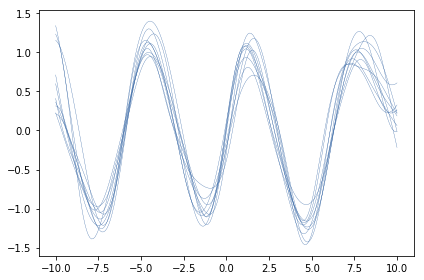

In [122]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=4.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

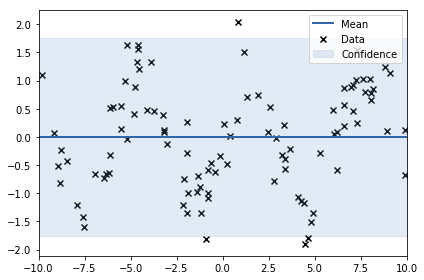

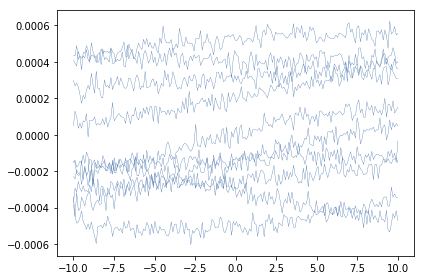

In [128]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=20.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

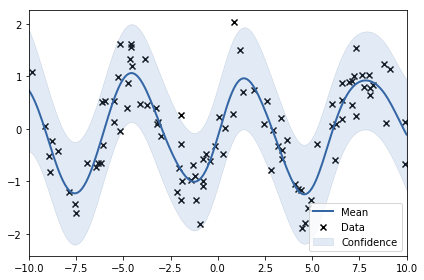

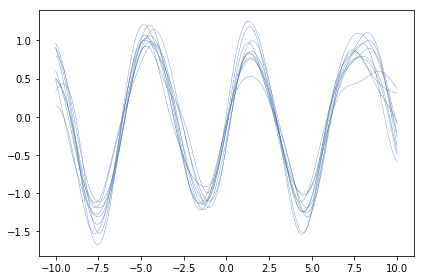

In [130]:
kernel = GPy.kern.RBF(input_dim=1, variance=400.0, lengthscale=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

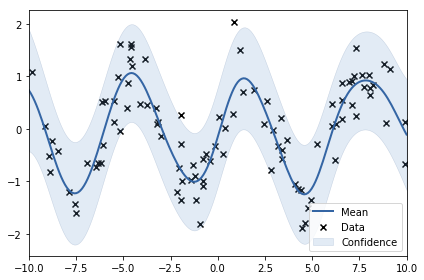

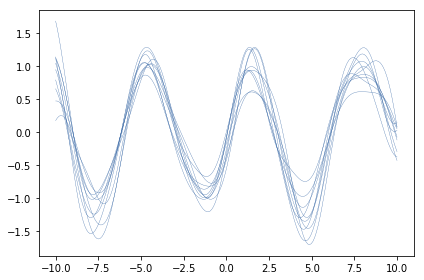

In [125]:
kernel = GPy.kern.RBF(input_dim=1, variance=0.001, lengthscale=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

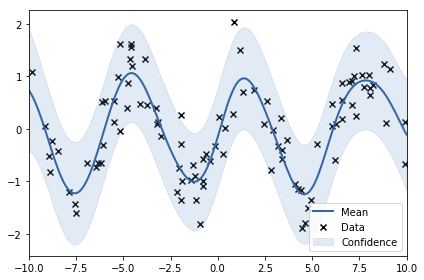

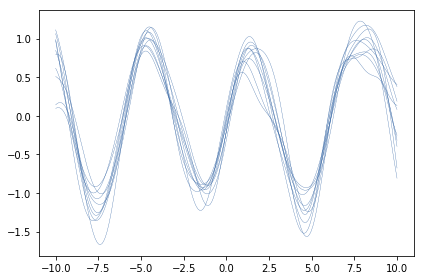

In [133]:
kernel = GPy.kern.RBF(input_dim=1, variance=0.001, lengthscale=0.01)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

## RatQuad

Nothing changes

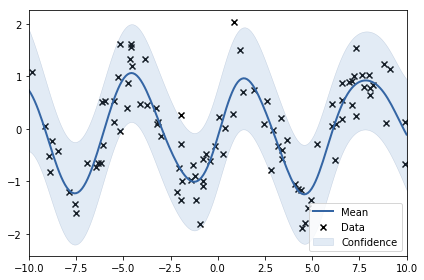

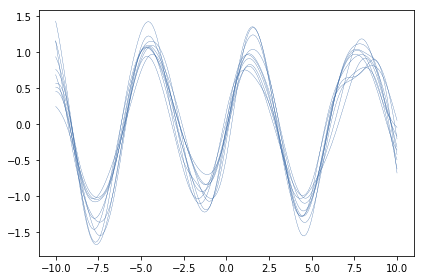

In [134]:
kernel = GPy.kern.RatQuad(input_dim=1, variance=1.0, lengthscale=1.0, power=1)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

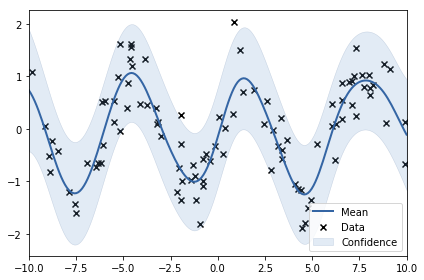

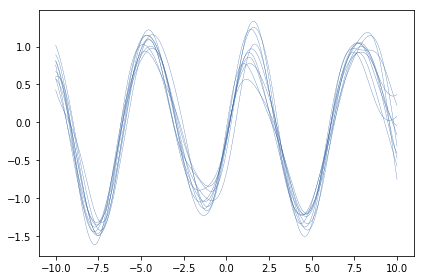

In [143]:
kernel = GPy.kern.RatQuad(input_dim=1, variance=1.0, lengthscale=1.0, power=100)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

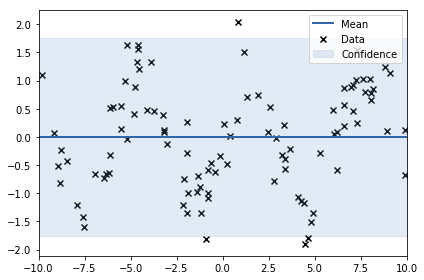

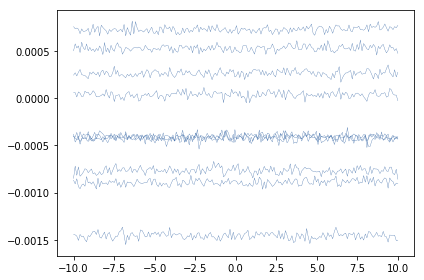

In [141]:
kernel = GPy.kern.RatQuad(input_dim=1, variance=1.0, lengthscale=1.0, power=0.00001)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

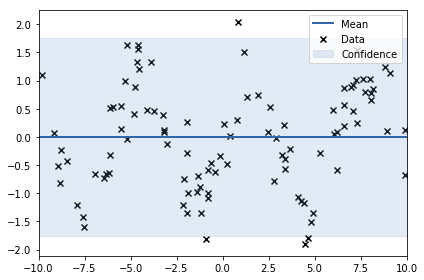

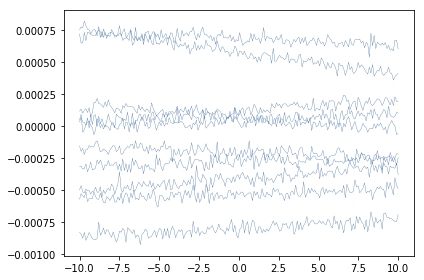

In [146]:
kernel = GPy.kern.RatQuad(input_dim=1, variance=1.0, lengthscale=100.0, power=2.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

## Linear 

 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


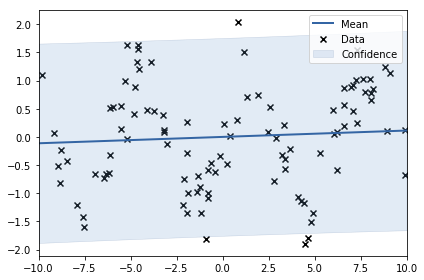

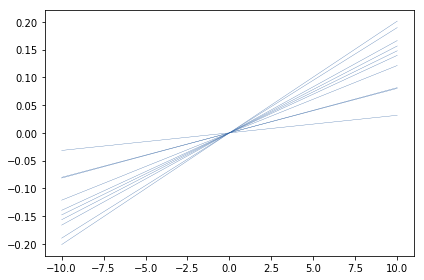

In [147]:
kernel = GPy.kern.Linear(input_dim=1, variances=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

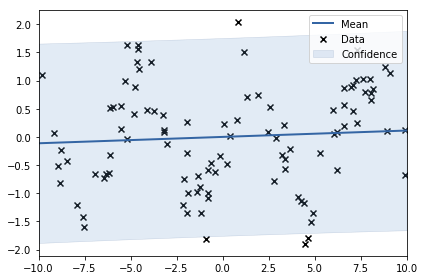

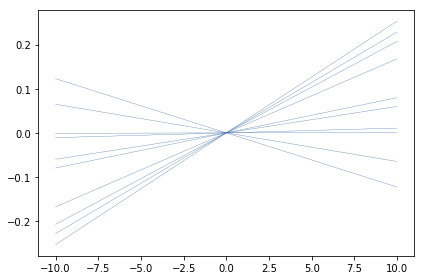

In [151]:
kernel = GPy.kern.Linear(input_dim=1, variances=100.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

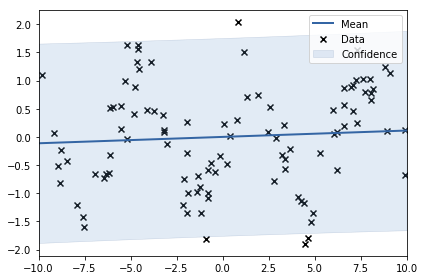

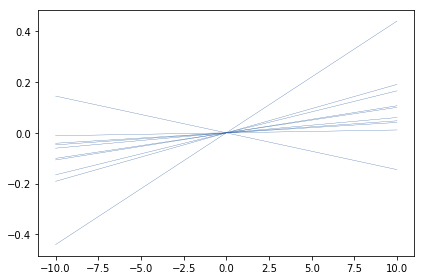

In [153]:
kernel = GPy.kern.Linear(input_dim=1, variances=0.001)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

## Brownian

 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


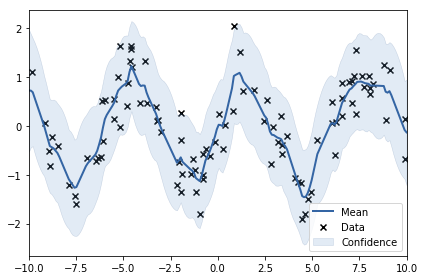

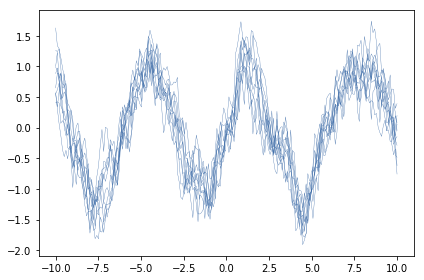

In [155]:
kernel = GPy.kern.Brownian(input_dim=1, variance=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

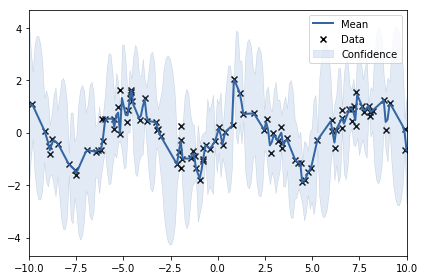

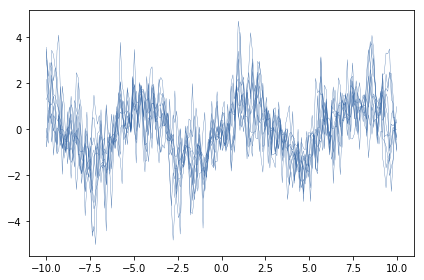

In [156]:
kernel = GPy.kern.Brownian(input_dim=1, variance=100.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

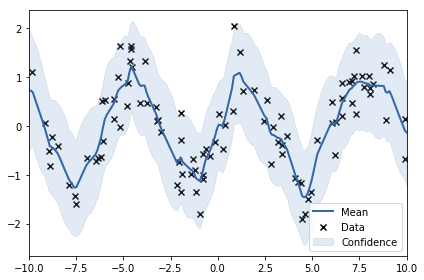

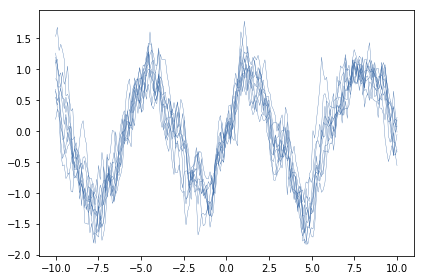

In [162]:
kernel = GPy.kern.Brownian(input_dim=1, variance=0.001)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

## Periodic Exponential

 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


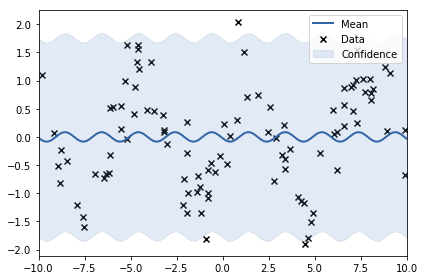

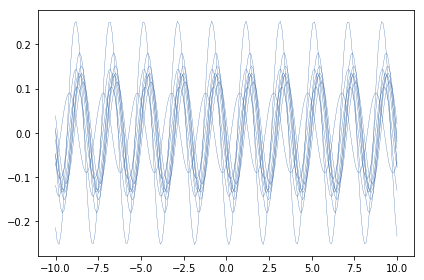

In [163]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=1.0, lengthscale=1.0, period=2.0, n_freq=1)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

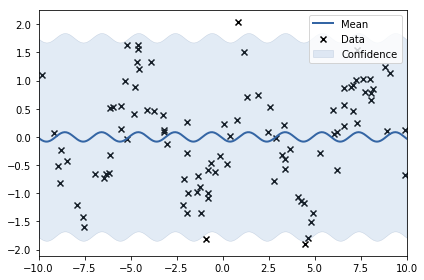

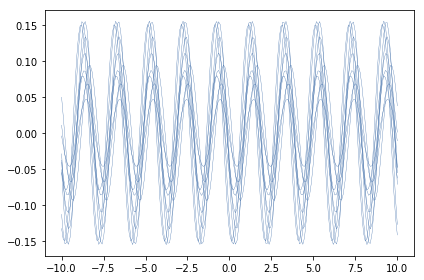

In [166]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=100.0, lengthscale=100.0, period=2.0, n_freq=1)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

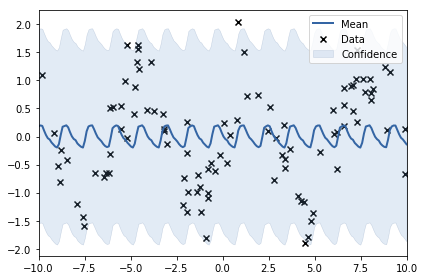

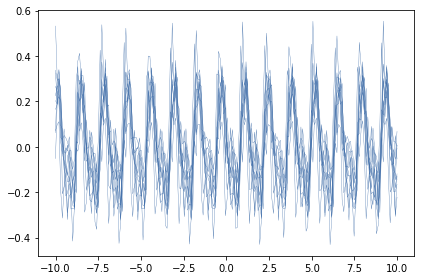

In [169]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=100.0, lengthscale=1.0, period=2.0, n_freq=10)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

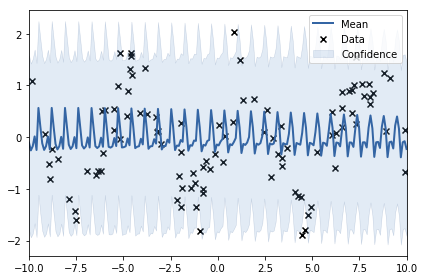

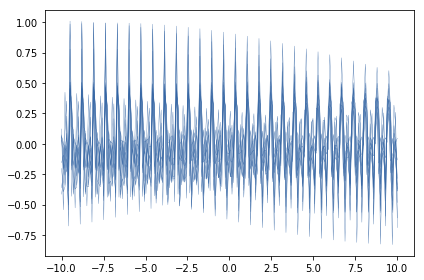

In [174]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=100.0, lengthscale=1.0, period=3.0, n_freq=5)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

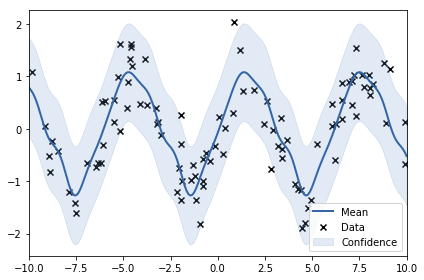

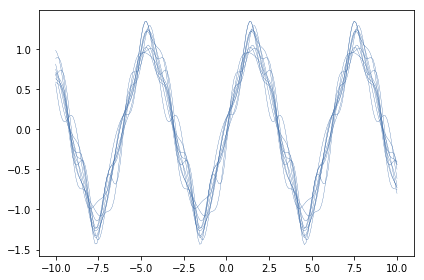

In [177]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=100.0, lengthscale=1.0, period=6.0, n_freq=5)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

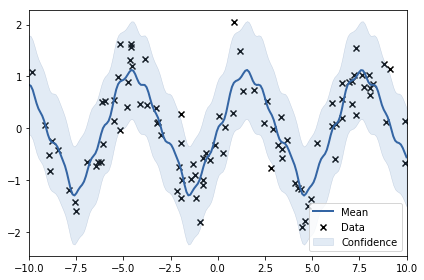

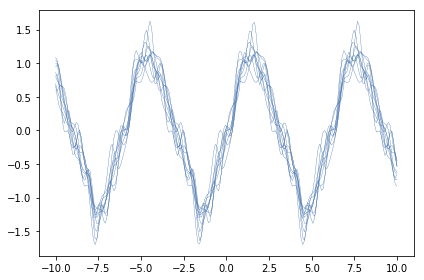

In [178]:
kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=100.0, lengthscale=1.0, period=6.0, n_freq=10)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])
_ = m.plot_samples(samples=10, plot_limits=[-10.0, 10.0])

# IV. A Challenging Example

Now we'll try to design a Gaussian process to model a difficult set of data. Don't worry about getting perfect results---it's hard!---but do your best.

In [80]:
def markov_jump_samples(x_min, x_max, n_samples, rate, step_scale, noise_scale):
    jump_times = []
    last_time = float(x_min)
    while last_time <= x_max:
        last_time += np.random.exponential(rate)
        jump_times.append(last_time)
    jump_times = np.array(jump_times)
    process_values = np.arange(len(jump_times) + 1) * step_scale
    process_values = process_values - np.mean(process_values)
    
    X = np.random.uniform(x_min, x_max, size=(n_samples, 1))
    Y = np.zeros((n_samples, 1))
    for i in range(n_samples):
        x = X[i, 0]
        ix = np.searchsorted(jump_times, x)
        Y[i, 0] = process_values[ix] + np.random.normal(scale=noise_scale)
        
    return X, Y

# NOTE: Take a look at this function and try to understand what it's doing. When you think you know, make sure
# this is consistent with the plots below.

In [81]:
# Seed to give a deterministic example:
np.random.seed(7)
X, Y = markov_jump_samples(-40.0, 40.0, 100, 10.0, 10.0, 0.05)

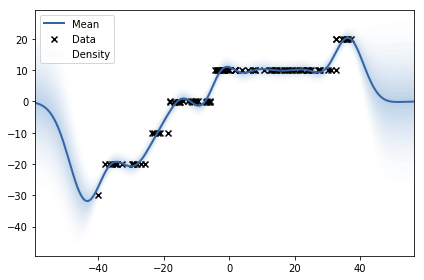

In [82]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()
_ = m.plot(plot_density=True)

In [ ]:
#
# TODO: Notice two bad phenomena in the above result:
#   1. The mean of the fit is not as "sharp" as the generated data at the stepping points.
#   2. In long flat regions like between -20 and 0, there is "ringing" where the mean fluctuates while the data is flat.
# Try to find a choice of kernel that improves on the RBF in this case. Present the results of at least two other
# kernel choices from GPy.
# 

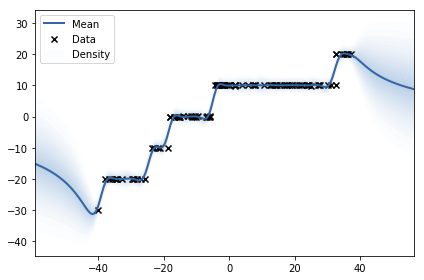

In [90]:
kernel = GPy.kern.RatQuad(input_dim=1, variance=3., lengthscale=1.0)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()
_ = m.plot(plot_density=True)

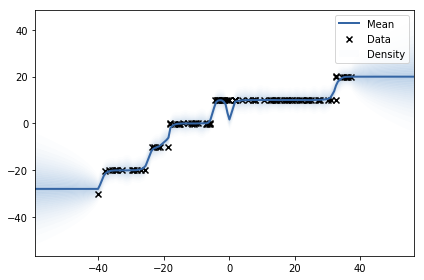

In [113]:
kernel = GPy.kern.Brownian(input_dim=1, variance=300)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()
_ = m.plot(plot_density=True)

# References

The beginning of this notebook is based on:

https://github.com/savinlab/gp_intro/blob/master/gp_regression_basic.ipynb